In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from trainer import Trainer
from models_resnet import Generator, Discriminator
import torch

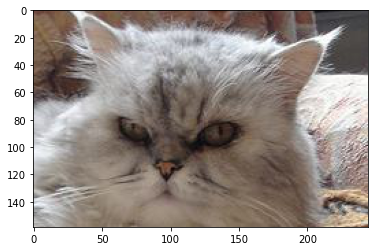

In [3]:
image = Image.open('cat_pictures.dir/cropped/CAT_00_00000001_000.jpg')
plt.imshow(image)

In [4]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms
import glob
from torchvision.utils import make_grid

In [5]:
class MyDataset(Dataset):
    def __init__(self, fnames):
        super().__init__()
        self.fnames = fnames
#         self.transform = transforms.Compose([transforms.Resize((32,32)),
#                                              transforms.ToTensor()])
        self.transform = transforms.Compose([transforms.Resize((64,64)),
                                             transforms.ToTensor()])
        self.num_images = len(fnames)

    def __len__(self):
        return self.num_images

    def __getitem__(self, idx):
        fname = self.fnames[idx]
        image = Image.open(fname)
        return self.transform(image)

In [10]:
mydataset = MyDataset(glob.glob('./cat_pictures.dir/cropped/*.jpg'))

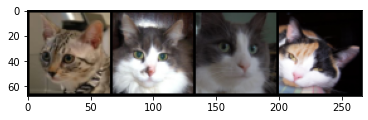

In [11]:
tmp = [mydataset[i] for i in range(4)]
grid_img = make_grid(tmp, nrow=4)
plt.imshow(grid_img.permute(1,2,0))

In [12]:
config = {'GAN_type': 'SNGAN-hinge',
          'lambda': 10,
          'lr_G': 2e-4,
          'lr_D': 2e-4,
          'batch_size': 128,
          'epoches': 400,
          'dim': 256,
          'zdim': 128,
          'D_step': 1,
          'G_step': 5,
          'z_samples': 100,
          'log_dir': './logs_kick.dir/',
          'ckpt_dir': './ckpts_kick.dir/',
          'kick': False}

In [14]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
trainer = Trainer(config, [3,64,64], Generator, Discriminator, device=device)

In [ ]:
# trainer.resume('model_390.pickle')

In [15]:
trainer.train(mydataset)

epoch 0:   3%|▎         | 2/75 [03:38<2:13:13, 109.50s/it, loss_G=0.558, loss_D=2.03]                                                                                            


KeyboardInterrupt: 